# Enunciado del problema 3

En el archivo crime_data.csv se encuentra el número de crímenes por cada 100.000 habitantes en cada uno de los estados de Estados Unidos, así como el porcentaje de la población que es urbana. Los crímenes se han agrupado en: asalto, asesinato y violación.

Segmenta este conjunto de datos utilizando k-means y obtén los centroides de cada clúster y el listado de los estados en cada uno de los clústeres. Para ello, se ha de encontrar el número óptimo de clúster en el que se divide el conjunto de datos.

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Imports

Importamos los módulos necesarios para resolver el problema

In [2]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold

## Carga

Carga del csv 'crime_data.csv' y visualización de las 5 primeras líneas para ver la estrucutura.

In [3]:
df = pd.read_csv('crime_data.csv')
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Visualizamos los tipos de variables y la distribución de los datos faltantes que contiene el dataFrame, también vemos el tamaño del DataFrame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


## Preparación del dataset para entrenamiento

Seleccionamos la data que nos va a servir para separar los datos.

In [5]:
x = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

Normalización de las variables en diferentes unidades para evitar sesgos.

In [6]:
columns = ['Murder', 'Assault', 'Rape', 'UrbanPop']

scaler = StandardScaler().fit(x)
data = scaler.transform(x)
    
x = pd.DataFrame(data = data, columns = columns)

Visualizamos las 5 primeras líneas del dataFrame con las variables normalizadas.

In [7]:
x.head()

,Murder,Assault,Rape,UrbanPop
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


Seleccionamos las variables que tienen suficiente varianza para poder diferenciar los clústeres.

In [8]:
var_th = VarianceThreshold(threshold = 0.60)
x_var = var_th.fit_transform(x)

print("Variables originales ", x.shape[1])
print("Variables finales ", x_var.shape[1])

print("Listado de variables ", np.asarray(list(x))[var_th.get_support()])

Variables originales  4
Variables finales  4
Listado de variables  ['Murder' 'Assault' 'Rape' 'UrbanPop']


Nos quedamos con las variables resultantes del filtro de varianza.

In [9]:
data = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

## Elección del nº de clústers

Vamos a utilizar el __método de la sillhouette__ para determinar el nº de clústers adecuados para nuestra data.

In [10]:
def plot_sillhouette(data, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(data)
        sillhouette_avgs.append(silhouette_score(data, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)

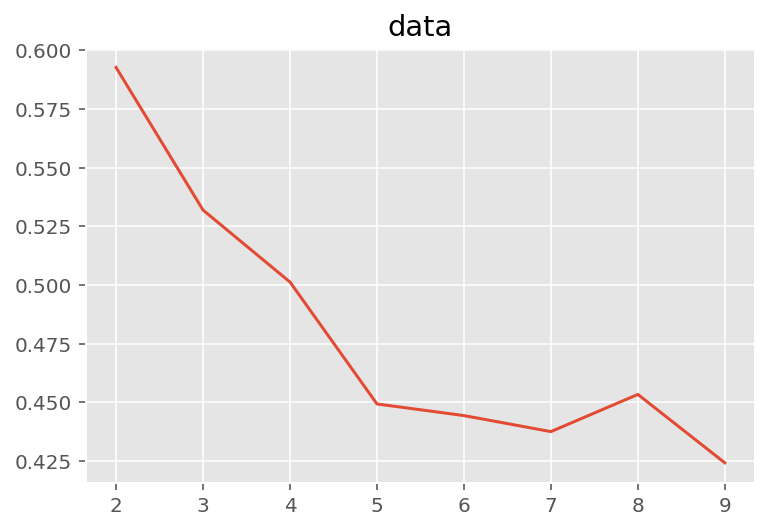

In [11]:
plot_sillhouette(data, 'data')

## Creación del modelo

El __máximo de la gráfica de la sillhouette__ se alcanza en __2__, es por eso que elegimos 2 como el __nº óptimo de clústers__. Fijamos la semilla para asegurar la reproducibilidad de los resultados.

In [12]:
kmeans = KMeans(n_clusters = 2,
                random_state = 1).fit(data)

classes = kmeans.predict(data)

## Cálculo de los centroides

In [13]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 11.85714286 255.          28.11428571  67.61904762]
 [  4.84137931 109.75862069  16.24827586  64.03448276]]


## Visualización de las ciudades que quedan en cada clúster

In [14]:
labels = kmeans.labels_
df['labels'] = labels

for label in set(labels):
    print(label, df.loc[df.labels == label,'State'].values)

0 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Delaware' 'Florida' 'Georgia' 'Illinois' 'Louisiana' 'Maryland'
 'Michigan' 'Mississippi' 'Nevada' 'New Mexico' 'New York'
 'North Carolina' 'South Carolina' 'Tennessee' 'Texas']
1 ['Connecticut' 'Hawaii' 'Idaho' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Maine' 'Massachusetts' 'Minnesota' 'Missouri' 'Montana' 'Nebraska'
 'New Hampshire' 'New Jersey' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon'
 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


## Visualización de los resultados para cada par de variables

In [15]:
color_map = array(['b','g','r','c','m','y'])

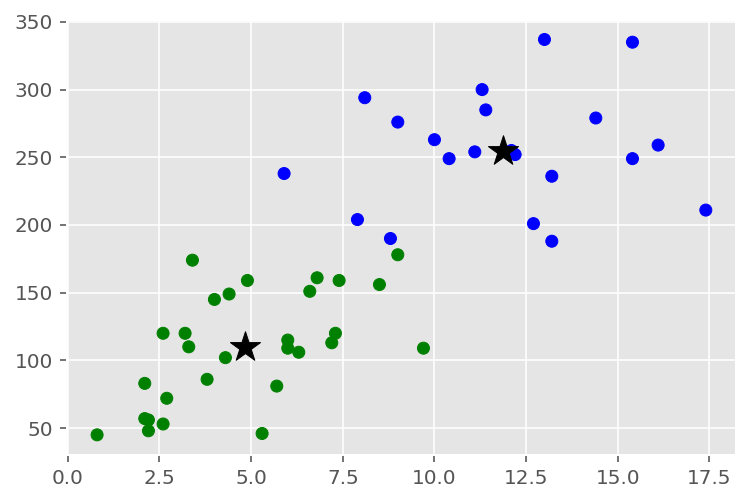

In [16]:
scatter(data.loc[:, 'Murder'], data.loc[:, 'Assault'],
        c = color_map[classes])
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')

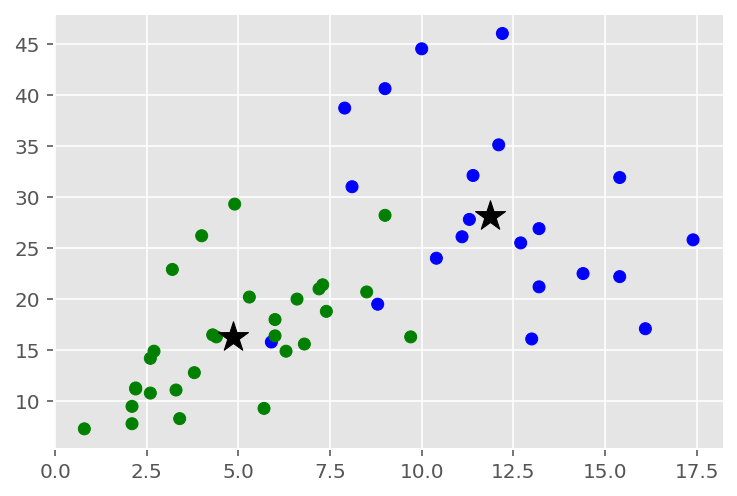

In [17]:
scatter(data.loc[:, 'Murder'], data.loc[:, 'Rape'],
        c = color_map[classes])
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 2],
        marker = '*',
        s = 250,
        color = 'black')

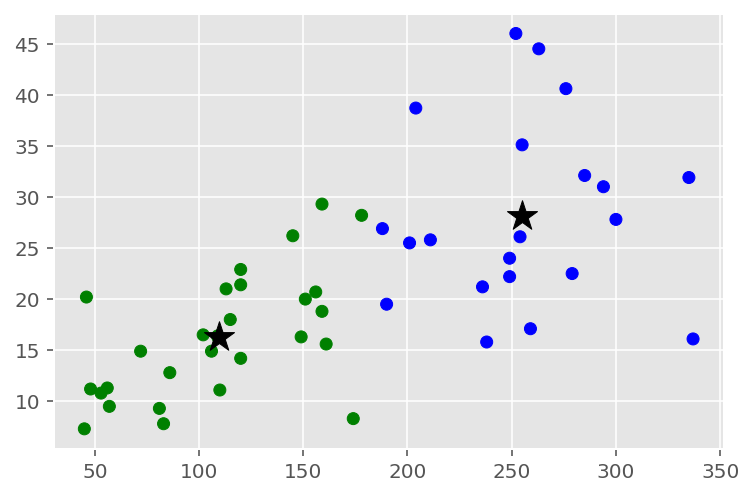

In [18]:
scatter(data.loc[:, 'Assault'], data.loc[:, 'Rape'],
        c = color_map[classes])
scatter(kmeans.cluster_centers_[:, 1],
        kmeans.cluster_centers_[:, 2],
        marker = '*',
        s = 250,
        color = 'black')

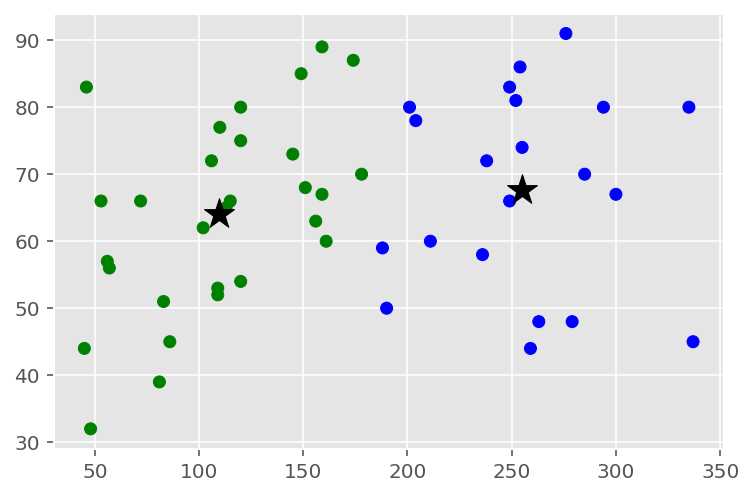

In [19]:
scatter(data.loc[:, 'Assault'], data.loc[:, 'UrbanPop'],
        c = color_map[classes])
scatter(kmeans.cluster_centers_[:, 1],
        kmeans.cluster_centers_[:, 3],
        marker = '*',
        s = 250,
        color = 'black')

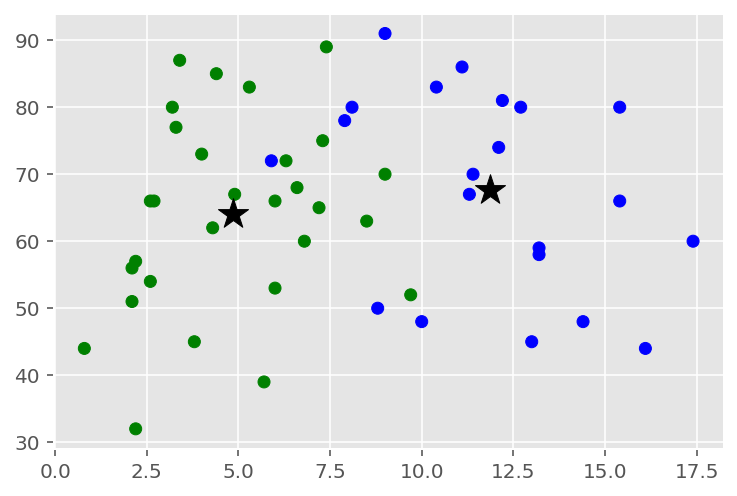

In [20]:
scatter(data.loc[:, 'Murder'], data.loc[:, 'UrbanPop'],
        c = color_map[classes])
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 3],
        marker = '*',
        s = 250,
        color = 'black')

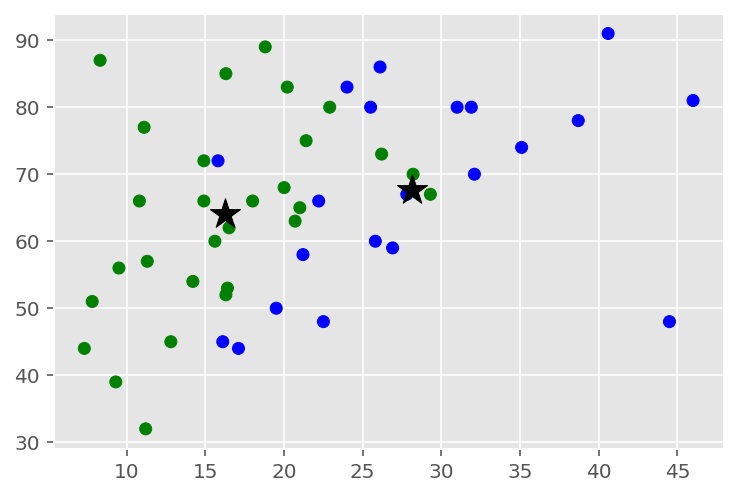

In [21]:
scatter(data.loc[:, 'Rape'], data.loc[:, 'UrbanPop'],
        c = color_map[classes])
scatter(kmeans.cluster_centers_[:, 2],
        kmeans.cluster_centers_[:, 3],
        marker = '*',
        s = 250,
        color = 'black')

Vemos que la separación de los datos es suficientemente clara para cada par de variables con 2 clústers, por lo que el modelo hace una buena separación de los datos. 